<a href="https://colab.research.google.com/github/PiyushiAnand/FinSearch_RL/blob/main/arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# Step 1: Load and preprocess the data
train_data = pd.read_excel("HistoricalPrices-3.xlsx")
test_data = pd.read_excel("nifty50.xlsx")


In [3]:
# Step 2: Train the ARIMA model
# Assuming you have the appropriate ARIMA order (p, d, q) determined beforehand
# Replace (p, d, q) with the actual order determined from your training data
#p,d,q are hyperparameters that need tuning
#p->past values of the time series used to predict the current value
#d->number of differences needed to make the time series stationary.
#q->the number of lagged forecast errors used to predict the current value
p, d, q = (1, 1, 1)
model = ARIMA(train_data["Close"].values, order=(p, d, q))
model_fit = model.fit()


In [4]:
# Step 3: Make predictions with the ARIMA model
predictions = model_fit.forecast(steps=len(test_data))
predicted_prices = predictions[0]

In [6]:
initial_price = 10000
test_data["Predicted_Price"] = predicted_prices
test_data["Profit"] = test_data["Close"] - initial_price


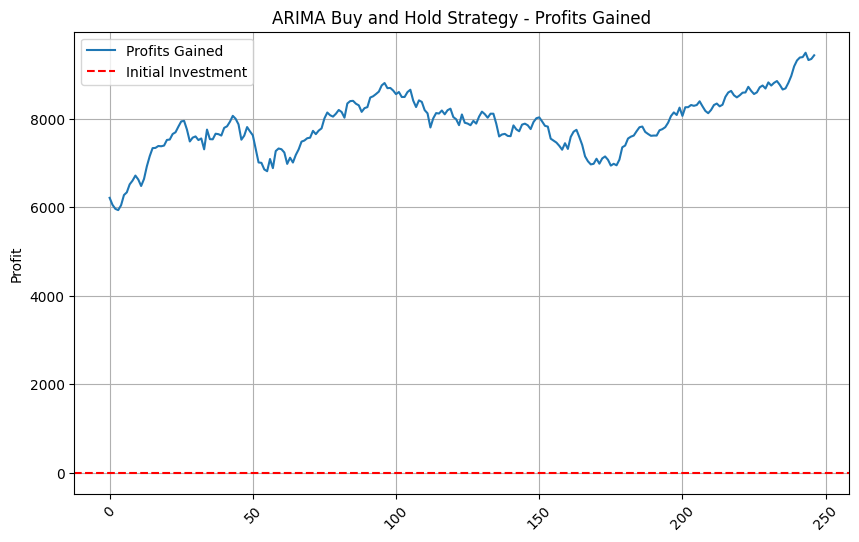

In [9]:
# Step 5: Plot the profits over the testing period
plt.figure(figsize=(10, 6))
plt.plot(test_data["Profit"], label="Profits Gained")
plt.axhline(0, color='red', linestyle='--', label="Initial Investment")
plt.ylabel("Profit")
plt.legend()
plt.title("ARIMA Buy and Hold Strategy - Profits Gained")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
